In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
DATA = Path("../Data")

In [3]:
train = pd.read_csv(DATA / "fog_train.csv")
test = pd.read_csv(DATA / "fog_test.csv")

In [4]:
train

,Unnamed: 0,fog_train.year,fog_train.month,fog_train.day,fog_train.time,fog_train.minute,fog_train.stn_id,fog_train.ws10_deg,fog_train.ws10_ms,fog_train.ta,fog_train.re,fog_train.hm,fog_train.sun10,fog_train.ts,fog_train.vis1,fog_train.class
0,1,I,1,1,0,10,AA,0.0,0.0,-6.4,0.0,38.9,0.0,-2.8,20000,4
1,2,I,1,1,0,20,AA,0.0,0.0,-6.3,0.0,37.9,0.0,-2.7,20000,4
2,3,I,1,1,0,30,AA,0.0,0.0,-6.3,0.0,40.0,0.0,-2.6,20000,4
3,4,I,1,1,0,40,AA,27.8,0.4,-6.2,0.0,39.5,0.0,-2.6,20000,4
4,5,I,1,1,0,50,AA,59.7,0.5,-6.1,0.0,39.8,0.0,-2.5,20000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156454,3156455,K,12,31,23,10,EC,305.3,7.7,2.5,0.0,50.2,0.0,-0.9,20000,4
3156455,3156456,K,12,31,23,20,EC,293.8,5.7,2.3,0.0,50.1,0.0,-1.3,20000,4
3156456,3156457,K,12,31,23,30,EC,274.2,4.9,2.2,0.0,51.0,0.0,-1.4,20000,4
3156457,3156458,K,12,31,23,40,EC,270.3,4.6,2.1,0.0,51.7,0.0,-1.6,20000,4


In [5]:
test

,Unnamed: 0,fog_test.year,fog_test.month,fog_test.day,fog_test.time,fog_test.minute,fog_test.stn_id,fog_test.ws10_deg,fog_test.ws10_ms,fog_test.ta,fog_test.re,fog_test.hm,fog_test.sun10,fog_test.ts,fog_test.class
0,1,L,1,1,0,0,AI,329.5,0.6,-2.5,0.0,87.5,0.0,-1.6,NaN
1,2,L,1,1,0,10,AI,321.8,1.2,-2.5,0.0,88.2,0.0,-1.6,NaN
2,3,L,1,1,0,20,AI,0.4,0.4,-2.5,0.0,88.6,0.0,-1.7,NaN
3,4,L,1,1,0,30,AI,323.6,0.7,-2.6,0.0,88.7,0.0,-1.6,NaN
4,5,L,1,1,0,40,AI,208.4,0.2,-2.6,0.0,89.0,0.0,-1.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262795,262796,L,12,31,23,10,ED,338.8,6.1,4.5,0.0,71.3,0.0,1.9,NaN
262796,262797,L,12,31,23,20,ED,335.2,5.8,4.6,0.0,71.4,0.0,1.9,NaN
262797,262798,L,12,31,23,30,ED,337.1,5.3,4.5,0.0,72.1,0.0,1.8,NaN
262798,262799,L,12,31,23,40,ED,322.0,3.7,4.3,0.0,72.5,0.0,1.4,NaN


## Columns Rename

- Year : 년도
- Month : 월
- Day : 일
- Time : 시간(0~23)
- Minute : 분(10분 단위)
- STN_ID : 지점 번호
- WS10_deg : 10분 평균 풍향(단위 : deg)
- WS10_ms : 10분 평균 풍속(단위 : m/s)
- TA : 1분 평균 기온 10분 주기(단위 : °C)
- RE : 강수 유무(0:무강수, 1:강수)
- HM : 1분 평균 상대 습도 10분 주기(단위 : %)
- sun10 : 1분 일사량 10분 단위 합계(단위 : °C)
- TS : 1분 평균 지면온도 10분 주기(단위 : °C)
- VIS1 : 1분 평균 시정 10분 주기(단위 : m) *VIS1 변수는 시정 구간을 알 수 있는 변수로 Test에는 제외
- class : 시정 구간

In [6]:
del train['Unnamed: 0']
del test['Unnamed: 0']

In [7]:
train.columns = train.columns.str.replace("fog_train.", "")

In [8]:
train.columns

Index(['year', 'month', 'day', 'time', 'minute', 'stn_id', 'ws10_deg',
       'ws10_ms', 'ta', 're', 'hm', 'sun10', 'ts', 'vis1', 'class'],
      dtype='object')

In [9]:
test.columns = test.columns.str.replace("fog_test.", "")

In [10]:
test.columns

Index(['year', 'month', 'day', 'time', 'minute', 'stn_id', 'ws10_deg',
       'ws10_ms', 'ta', 're', 'hm', 'sun10', 'ts', 'class'],
      dtype='object')

In [11]:
def rename(data) :
    name = ["년도", "월", "일", "시간", "분", "지점번호", 
        "10분평균풍향", "10분평균풍속", "10분평균기온", 
        "강수유무", "10분평균상대습도", "10분일사량합",
        "10분평균지면온도", "10분평균시정", "시정구간"]
    columns = data.columns
    
    if 'vis1' not in columns:
        name.remove("10분평균시정")
    
    name_dict = dict(zip(columns, name))
    df_data = data.rename(columns=name_dict)
    return df_data

In [12]:
df_train = rename(train)
df_train

,년도,월,일,시간,분,지점번호,10분평균풍향,10분평균풍속,10분평균기온,강수유무,10분평균상대습도,10분일사량합,10분평균지면온도,10분평균시정,시정구간
0,I,1,1,0,10,AA,0.0,0.0,-6.4,0.0,38.9,0.0,-2.8,20000,4
1,I,1,1,0,20,AA,0.0,0.0,-6.3,0.0,37.9,0.0,-2.7,20000,4
2,I,1,1,0,30,AA,0.0,0.0,-6.3,0.0,40.0,0.0,-2.6,20000,4
3,I,1,1,0,40,AA,27.8,0.4,-6.2,0.0,39.5,0.0,-2.6,20000,4
4,I,1,1,0,50,AA,59.7,0.5,-6.1,0.0,39.8,0.0,-2.5,20000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156454,K,12,31,23,10,EC,305.3,7.7,2.5,0.0,50.2,0.0,-0.9,20000,4
3156455,K,12,31,23,20,EC,293.8,5.7,2.3,0.0,50.1,0.0,-1.3,20000,4
3156456,K,12,31,23,30,EC,274.2,4.9,2.2,0.0,51.0,0.0,-1.4,20000,4
3156457,K,12,31,23,40,EC,270.3,4.6,2.1,0.0,51.7,0.0,-1.6,20000,4


In [13]:
df_test = rename(test)
df_test

,년도,월,일,시간,분,지점번호,10분평균풍향,10분평균풍속,10분평균기온,강수유무,10분평균상대습도,10분일사량합,10분평균지면온도,시정구간
0,L,1,1,0,0,AI,329.5,0.6,-2.5,0.0,87.5,0.0,-1.6,NaN
1,L,1,1,0,10,AI,321.8,1.2,-2.5,0.0,88.2,0.0,-1.6,NaN
2,L,1,1,0,20,AI,0.4,0.4,-2.5,0.0,88.6,0.0,-1.7,NaN
3,L,1,1,0,30,AI,323.6,0.7,-2.6,0.0,88.7,0.0,-1.6,NaN
4,L,1,1,0,40,AI,208.4,0.2,-2.6,0.0,89.0,0.0,-1.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262795,L,12,31,23,10,ED,338.8,6.1,4.5,0.0,71.3,0.0,1.9,NaN
262796,L,12,31,23,20,ED,335.2,5.8,4.6,0.0,71.4,0.0,1.9,NaN
262797,L,12,31,23,30,ED,337.1,5.3,4.5,0.0,72.1,0.0,1.8,NaN
262798,L,12,31,23,40,ED,322.0,3.7,4.3,0.0,72.5,0.0,1.4,NaN


In [32]:
# test class에 결측이 아닌 -99가 존재함 해당 값의 의미를 알아야함

test[test.isin([-99, -99., -99.9, -999])].count()

year           0
month          0
day            0
time           0
minute         0
stn_id         0
ws10_deg     224
ws10_ms      224
ta            91
re          4503
hm            57
sun10        115
ts          7643
class       2694
dtype: int64

In [25]:
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic'
)
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size' : 10, 'font.family' : 'NanumGothic'})
plt.rc('font', family='NanumGothic')

def null_data(data, null_list):
    data[data.isin(null_list)] = np.nan
    display(data.isna().sum())
    print(data.shape)
    
    fig = plt.figure(figsize=(13, 6))
    missing = data.isnull().sum() / data.shape[0]
    missing = missing[missing > 0]
    missing.sort_values(inplace=True)
    missing.plot.bar(color='orange')
    plt.title('변수별 결측치 비율')
    plt.show()
    
    return data


In [26]:
null_list = [-99, -99., -99.9, -999]

년도               0
월                0
일                0
시간               0
분                0
지점번호             0
10분평균풍향       5910
10분평균풍속       5826
10분평균기온       3867
강수유무         15228
10분평균상대습도     3616
10분일사량합      43910
10분평균지면온도    88639
10분평균시정      22516
시정구간         22516
dtype: int64

(3156459, 15)


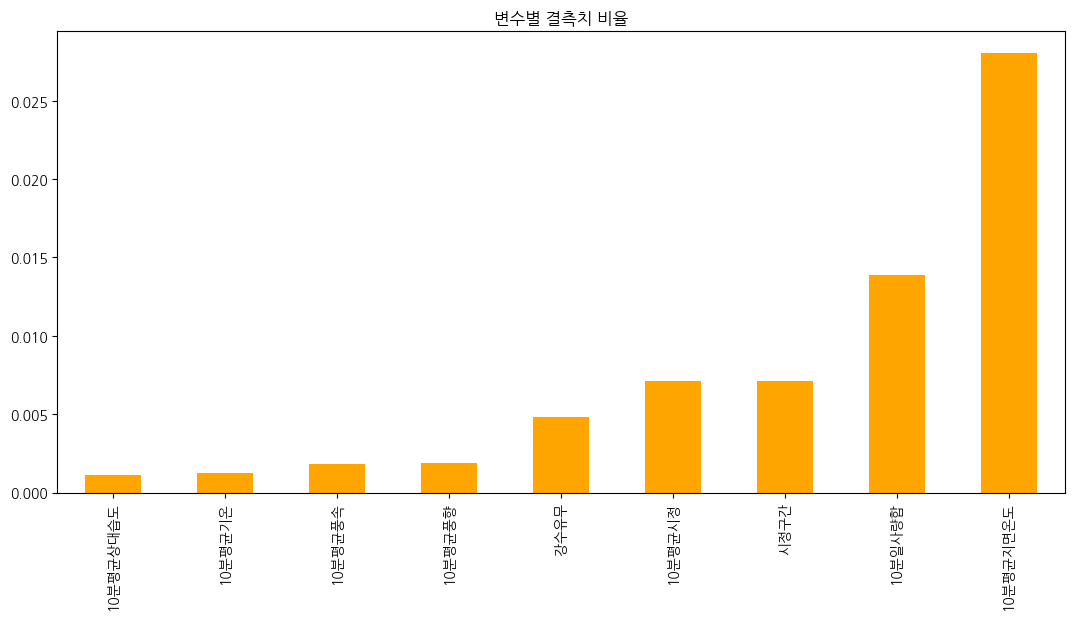

In [27]:
df_train_nan = null_data(df_train, null_list)

년도                0
월                 0
일                 0
시간                0
분                 0
지점번호              0
10분평균풍향         224
10분평균풍속         224
10분평균기온          91
강수유무           4503
10분평균상대습도        57
10분일사량합         115
10분평균지면온도      7643
시정구간         262800
dtype: int64

(262800, 14)


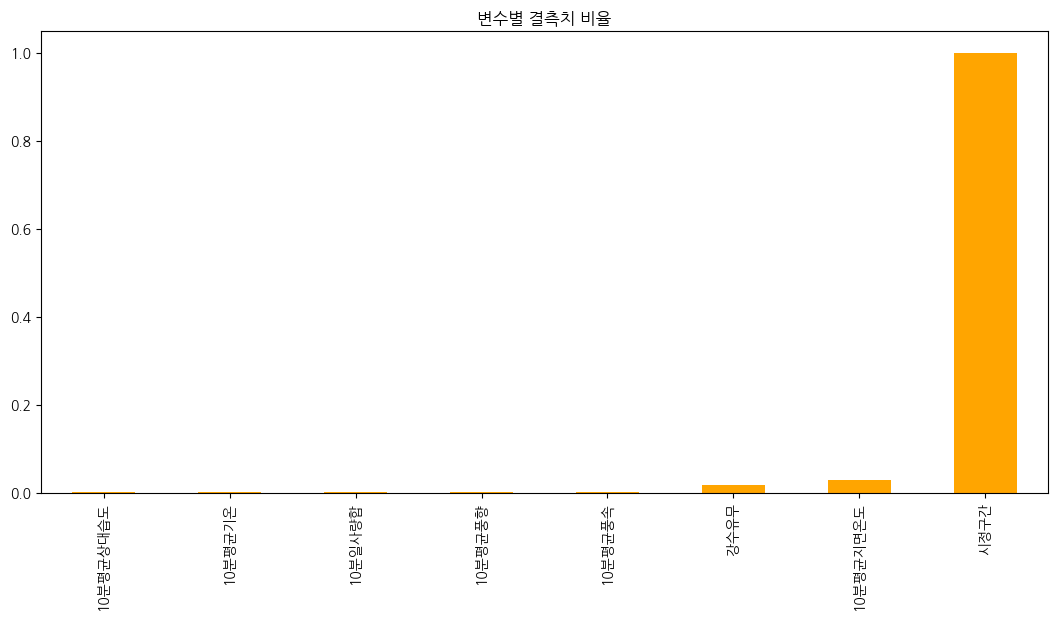

In [28]:
df_test_nan = null_data(df_test, null_list)

In [34]:
df_train_nan.to_csv("fog_train_transform_null.csv", index=False)
df_test_nan.to_csv("fog_test_transform_null.csv", index=False)